# The Cooper Pair box and the transmon

In this notebook we will investigate the Hamiltonian of a Josephson junction

$$
H = 4E_C (N - n_g)^2 - E_J \cos \varphi
$$

The two lowest energy eigenstates can be used to encode a qubit, which we refer to as a _Cooper_ _pair_ _box_.

In the parameter regime $E_J/E_C \gg 1$ the qubit is also referred to as a _transmon_. The transmon is the most succesful superconducting qubit to date, and used e.g. in all of Google and IBM quantum processors.

The most convenient way to implement this Hamiltonian is to use the charge basis:
$$
N = \sum_{n=-\infty}^\infty N |n\rangle \langle n|\\
f(N) = \sum_{n=-\infty}^\infty f(N) |n\rangle \langle n|\\
\cos(\varphi) = \frac{1}{2}\sum_{n=-\infty}^\infty \left( |n\rangle \langle n+1| + |n+1\rangle \langle n|\right)\\
$$
where $f(N)$ is any function of $N$. To represent these operators as matrices, we simply truncate the sum over $n = -N_t,-N_t+1,\dots,N_t-1,N_t$.

To initialize the operators as QuTiP objects, the easeies way is to first construct a matrix using numpy, and pass that as an argument to `Qobj`. The following example illustrates how it can be done:

In [36]:
import numpy as np
import qutip as qt

def charge_op(ncut):
    # Construct charger operator N
    # ncut = truncation parameter in charge basis
    mat = np.diag(np.arange(-ncut, ncut+1, 1))
    return qt.Qobj(mat)

charge_op(3)

Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = True
Qobj data =
[[-3.  0.  0.  0.  0.  0.  0.]
 [ 0. -2.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  3.]]

### Exercise 1:

Construct the above Hamiltonian and plot its 3 lowest eigenvalues as a function of $n_g \in [-1,1]$ for the following parameters:

$$
E_J/E_C = 2, 10, 50
$$

Hint: The method `H.eigenenergies()` can be used to extract the eigenvalues.

Insert your solution below.

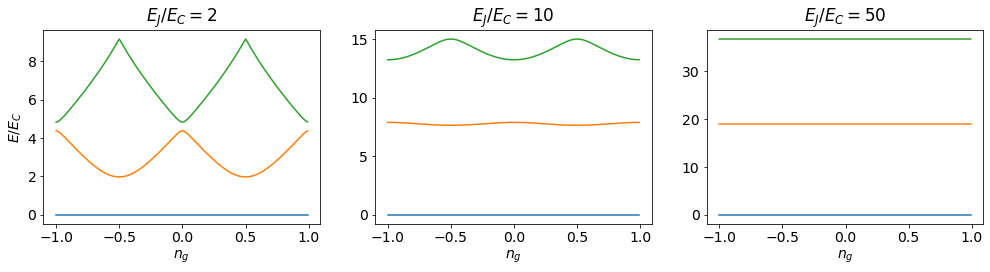

In [69]:
# Solution

# Note: Ground state energy set to zero by convention

import matplotlib.pyplot as plt
%matplotlib inline

def cosphi_op(ncut):
    # Construct cos(phi) operator
    # ncut = truncation parameter in charge basis
    dim = 2*ncut + 1
    dim = 2*ncut+1
    mat = 0.5*(np.diag(np.ones(dim-1), 1) + np.diag(np.ones(dim-1), -1))
    return qt.Qobj(mat)   

def spectrum(EC, EJ, ng, ncut):
    # construct H
    N = charge_op(ncut)
    cosphi = cosphi_op(ncut)
    H = 4 * EC * (N ** 2 - 2 * ng * N + ng ** 2) - EJ * cosphi
    # return four lowest eigenalues
    return H.eigenenergies()


fig = plt.figure(figsize=(14, 4))
plt.rc('font', size=14)

ax = fig.add_subplot(1, 3, 1)
bx = fig.add_subplot(1, 3, 2)
cx = fig.add_subplot(1, 3, 3)

ngrange = np.arange(-1, 1, 0.01)
ncut = 10

def plotter(ax, EC, EJ):
    vals = np.array([spectrum(EC, EJ, ng, ncut) for ng in ngrange])
    ax.plot(ngrange, vals[:, 0] - vals[:, 0])
    ax.plot(ngrange, vals[:, 1] - vals[:, 0])
    ax.plot(ngrange, vals[:, 2] - vals[:, 0])
    
plotter(ax, 1, 2)
plotter(bx, 1, 10)
plotter(cx, 1, 50)

ax.set_title(r'$E_J/E_C=2$')
bx.set_title(r'$E_J/E_C=10$')
cx.set_title(r'$E_J/E_C=50$')

ax.set_ylabel(r'$E/E_C$')
ax.set_xlabel(r'$n_g$')
bx.set_xlabel(r'$n_g$')
cx.set_xlabel(r'$n_g$')

fig.tight_layout()

**Question:** Why do you think the transmon regime where $E_J/E_C \gg 1$ is better for qubit operation?